In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# A tool to visualize the geometry of the binary lens system

This piece of code was used to generate a sketch of the binary lens system. You can modify the parameters below to change the geometry.

## Binary lenses: definition

In the following examples we will consider binary lenses composed of two point masses $M_1$ and $M_2$. 
The two masses are related by $q=M_1/M_2$. They are placed at a distance $d$ from each other (where $d$ is in units of the lens Einstein radius). We choose the real axis to pass through the two point masses and assume that $z_2=-z_1$.  

The source is supposed to move behind the lens with a relative velocity $v_{rel}$ along a linear trajectory forming an angle $\theta_s$ with the real axis. The impact parameter $y_0$ is measured with respect to $z=0$. The sources reaches the minimal distance from $z=0$ at $t=t_0$. Consequently, the real and the imaginary parts of $z_s$ are given by

$$
\Re(z_s)=\cos(\theta_s)p-\sin(\theta_s)y_0
$$

and 

$$
\Im(z_s)=\sin(\theta_s)p+\cos(\theta_s)y_0
$$

where $p=(t-t_0)/t_E$. The effective Einstein radius, $\theta_E$, and Einstein crossing time, $t_E$, are those of a point-mass lens with mass $M_{tot}=M_1+M_2$.

As for the point lens $D_L$ and $D_S$ are the angular diameter distances to the lens and to the source.

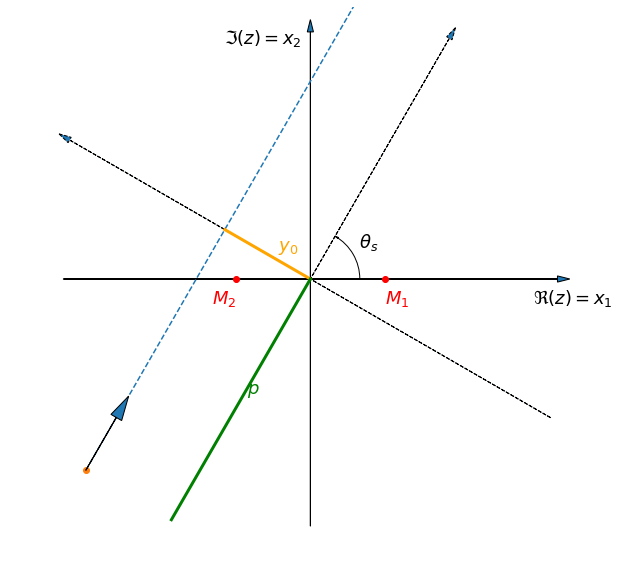

In [4]:
import matplotlib.pyplot as plt 
%matplotlib inline
from matplotlib.patches import Arc
import numpy as np

# parameters to play with:
t0 = 0
tE = 20.0
y0_ = 0.8#0.25
theta=60.0
d=1.2
#


times=np.linspace(-45,45,730)
p = (times-t0)/tE
y0 = np.ones(len(p))*y0_

angle_rad = theta*np.pi/180.

x=p*np.cos(theta*np.pi/180.)-y0*np.sin(theta*np.pi/180.)
y=p*np.sin(theta*np.pi/180.)+y0*np.cos(theta*np.pi/180.)

# to represent y0 in the rotated frame
xx0=-y0_*np.sin(theta*np.pi/180.)
yy0=y0_*np.cos(theta*np.pi/180.)
xx0_label=(-y0_/2.+0.1)*np.sin(theta*np.pi/180.)
yy0_label=(y0_/2.+0.05)*np.cos(theta*np.pi/180.)

# to represent p in the rotated frame
xx1=p[0]*np.cos(theta*np.pi/180.)
yy1=p[0]*np.sin(theta*np.pi/180.)
xx1_label=(p[0]/2.+0.1)*np.cos(theta*np.pi/180.)
yy1_label=(p[0]/2.+0.05)*np.sin(theta*np.pi/180.)

# rotated axes
x_p=p*np.cos(theta*np.pi/180.)
y_p=p*np.sin(theta*np.pi/180.)
x_p_=p*np.cos(theta*np.pi/180.+np.pi/2.)
y_p_=p*np.sin(theta*np.pi/180.+np.pi/2.)


fig,ax=plt.subplots(1,1,figsize=(10,10))
#ax.plot(p,y0,'-')
ax.plot(x,y,'--')
ax.plot(x[0],y[0],'o')
ax.arrow(x[0],y[0],x[80]-x[0],y[80]-y[0],head_width=0.1, head_length=0.2,zorder=10)
ax.arrow(-2,0,4,0,head_width=0.05, head_length=0.1,linestyle='solid')
ax.arrow(0,-2,0,4,head_width=0.05, head_length=0.1,linestyle='solid')
#ax.plot([-2,2],[0,0],color='black')
#ax.plot([0,0],[-2,2],color='black')
ax.plot(d/2.0,0,'o',color='red')
ax.plot(-d/2.0,0,'o',color='red')
ax.plot([0,xx0],[0,yy0],'-',color='orange',lw=3,zorder=10)
ax.plot([0,xx1],[0,yy1],'-',color='green',lw=3,zorder=10)
ax.text(xx0_label,yy0_label,'$y_0$',color='orange',fontsize=18)
ax.text(xx1_label,yy1_label,'$p$',color='green',fontsize=18)

ax.arrow(x_p[0],y_p[0],x_p[len(p)-1]-x_p[0],y_p[len(p)-1]-y_p[0],
         head_width=0.05, head_length=0.1,linestyle='dashed')
ax.arrow(x_p_[0],y_p_[0],x_p_[len(p)-1]-x_p_[0],y_p_[len(p)-1]-y_p_[0],
         head_width=0.05, head_length=0.1,linestyle='dashed')
#ax.plot(x_p,y_p,'--',color='black')
#ax.plot(x_p_,y_p_,'--',color='black')
arc_radius = 0.4
arc = Arc((0, 0),
          arc_radius*2, arc_radius*2,  # ellipse width and height
          theta1=0, theta2=theta, linestyle='solid')
ax.add_patch(arc)
arc_arrow_length = 0.03
arc_arrow_dx = arc_arrow_length * np.cos(angle_rad + np.pi / 2)
arc_arrow_dy = arc_arrow_length * np.sin(angle_rad + np.pi / 2)
ax.arrow(
    arc_radius * np.cos(angle_rad) - arc_arrow_dx,
    arc_radius * np.sin(angle_rad) - arc_arrow_dy,
    # We want to define a vector,
    # but we don't want to draw any line besides arrow head,
    # so we make arrow "body" unnoticeable.
    arc_arrow_dx * 0.000001,
    arc_arrow_dy * 0.000001,
    head_width=0.01,
    head_length=0.03,
    color='black',zorder=10)
ax.text(arc_radius * np.cos(angle_rad/2)+0.05, arc_radius * np.sin(angle_rad/2)+0.05,
       r'$\theta_s$',fontsize=18)
ax.text(d/2.0,-0.2,'$M_1$',color='red',fontsize=18)
ax.text(-d/2.0-0.2,-0.2,'$M_2$',color='red',fontsize=18)
ax.set_xlim([-2.2,2.2])
ax.set_ylim([-2.2,2.2])
ax.text(1.8,-0.2,'$\Re(z)=x_1$',fontsize=18)
ax.text(-0.7,1.9,'$\Im(z)=x_2$',fontsize=18)
ax.set_aspect('equal')
plt.axis('off')
fig.savefig('binary_lens_sketch.png')





# Critical lines and caustics of the binary lens

The critical lines and caustics of the binary lens are determined by solving numerically the equation

$$
\frac{\partial z_s}{\partial z^*}=e^{i\phi}
$$

for any $\phi \in [0,2\pi)$.

The equation can be turned into a fourth order complex polynomial, of which we shall find the roots:

$$
p_4(z)=z^4-z^2(2z_1^{*2}+e^{i\phi})-zz_1^*2(m_1-m_2)e^{i\phi}+z_1^{*2}(z_1^{*2}-e^{i\phi})=0
$$

For each $\phi$ there are up to $4$ roots (critical points). By using the lens equation, these can be mapped on the source plane to derive the caustics:

$$
z_{cau}=z_{crit}-\frac{m_1}{z_{crit}^*-z_1^*}-\frac{m_2}{z_{crit}^*-z_2^*} \;.
$$

***What is an alternative method to find the critical lines and the caustics?***

## Roots of polynomials

The roots of the polynomial 
$$
p(x)=x^n+a_{n−1}x^{n−1}+\cdots+a_1x+a_0
$$
can be found by building its companion matrix
$$C=\left[ \begin{array}{ccccc}
0 & 0 & \cdots & 0 & -a_0  \\
1 & 0 & \cdots & 0 & -a_1 \\
0 & 1 & \cdots & 0 & -a_2 \\
\vdots & \vdots & \ddots & \vdots & \vdots \\
0 & 0 & \cdots & 1 & -a_{n-1}   
\end{array} \right]
$$
such as the characteristic polynomial 

$$
\det(xI - C) = p(x)
$$

Consequently, the eigenvalues of $C$ are the roots of $p(x)$. Therefore, to find the critical points of the binary lens, we may proceed as follows:

* we build of the companion matrix of $p_4(z)$
* we diagonalize the matrix and find the eigenvalues 

This procedure is implemented in the ```numpy.roots``` method, which will be used below.



## A class for binary lenses

We begin by importing some relevant packages:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

We need to specify the properties of the binary lens. In addition, we will need to be able to change these properties in order to study different caustic configurations. Therefore, it is convenient to build a class. Since we will need to compute the Einstein radius, and this method is already implemented in the ```point_lens``` class from the previous python example, we will use this class which is now included in the ```microlensing.py``` module.

In [137]:
from microlensing import *

class binary_lens(object):
    """
    The object binary_lens will be built using the mass of the first lens, the mass ratio
    and the distance between the lenses in units of the equivalent Einstein radius.
    By convention, we will place the two lenses on the real axis and will put the origin of 
    the reference frame in the midpoint between the two masses.
    """
    def __init__(self,dl=5.0,ds=8,m1=1.0,q=1.0,d=2.0,t0=0.0,y0=0.1,theta=np.pi/4):
        self.z1=complex(d/2.0,0.0) ## this is how we define a complex number in python!
        self.q=q
        self.dl=dl
        self.ds=ds
        m2=m1/q
        self.mtot=m1+m2
        self.m1=m1/self.mtot
        self.m2=m2/self.mtot
        
        """
        we build a point_lens instance to compute the einstein radius
        and the Einstein crossing time. This requires to define a
        point source instance too.
        """
        ps = point_source(ds=ds)
        pl = point_lens(ps=ps, mass=m1+m2, dl=dl)                                           
        self.thetaE=pl.EinsteinRadius()
        self.tE=pl.EinsteinCrossTime()
        
        self.t0=t0
        self.y0=y0
        self.theta=theta

    """
    This function finds the lens critical lines and caustics
    """
    def CritCau(self,ncpt=10000):
        # set the phase vector
        phi_=np.linspace(0,2.*np.pi,ncpt)
        
        x=[]
        y=[]
        xs=[]
        ys=[]

        # we need to find the roots of our fourth order polynomial for each value of phi
        for i in range(phi_.size):
            phi=phi_[i]
            # the coefficients of the complex polynomial
            coefficients = [1.0,0.0,-2*np.conj(self.z1)**2-np.exp(1j*phi),
                            -np.conj(self.z1)*2*(self.m1-self.m2)*np.exp(1j*phi),
                            np.conj(self.z1)**2*(np.conj(self.z1)**2-np.exp(1j*phi))]
            # use the numpy function roots to find the roots of the polynomial
            z=np.roots(coefficients) # these are the critical points!
    
            # use the lens equation (complex form) to map the critical points 
            # on the source plane 
            zs=z-self.m1/(np.conj(z)-np.conj(self.z1))\
                -self.m2/((np.conj(z)-np.conj(-self.z1))) # these are the caustics!
    
            # append critical and caustic points
            x.append(z.real)
            y.append(z.imag)
            xs.append(zs.real)
            ys.append(zs.imag)
        
        return(np.array(x),np.array(y),np.array(xs),np.array(ys))
    
    """
    This function finds the images of a source at a given position with respect to the lens
    """
    def Images(self,ys1,ys2):
        zs=complex(ys1,ys2)
        m=0.5*(self.m1+self.m2)
        Dm=(self.m2-self.m1)/2.0

        c5=self.z1**2-np.conj(zs)**2
        c4=-2*m*np.conj(zs)+zs*np.conj(zs)**2\
            -2*Dm*self.z1-zs*self.z1**2
        c3=4.0*m*zs*np.conj(zs)+4.0*Dm*np.conj(zs)*self.z1\
            +2.0*np.conj(zs)**2*self.z1**2-2.0*self.z1**4
        c2=4.0*m**2*zs+4.0*m*Dm*self.z1\
            -4.0*Dm*zs*np.conj(zs)*self.z1\
            -2.0*zs*np.conj(zs)**2\
            *self.z1**2+4.0*Dm*self.z1**3\
            +2.0*zs*self.z1**4
        c1=-8.0*m*Dm*zs*self.z1\
            -4.0*Dm**2*self.z1**2\
            -4.0*m**2*self.z1**2\
            -4.0*m*zs*np.conj(zs)*self.z1**2\
            -4.0*Dm*np.conj(zs)*self.z1**3\
            -np.conj(zs)**2*self.z1**4\
            +self.z1**6
        c0=self.z1**2*(4.0*Dm**2*zs\
                       +4.0*m*Dm*self.z1\
                       +4.0*Dm*zs*np.conj(zs)*self.z1+\
                       2.0*m*np.conj(zs)*self.z1**2\
                       +zs*np.conj(zs)**2*self.z1**2\
                       -2*Dm*self.z1**3-zs*self.z1**4)

        coefficients=[c5,c4,c3,c2,c1,c0]

        images=np.roots(coefficients)
        """
        now, we need to drop the spurious solutions. This can be done 
        by checking which solutions satisfy the lens equation. 
        We compute the lens equation at the found solutions and check if 
        we recover the input source position.
        """
        z2=-self.z1
        deltazs=zs-(images-self.m1/(np.conj(images)-np.conj(self.z1))
                    -self.m2/(np.conj(images)-np.conj(z2)))
        return (np.array([images.real[np.abs(deltazs)<1e-3]]),
                np.array([images.imag[np.abs(deltazs)<1e-3]]))
    
    def SourcePos(self,t):
        p=(t-self.t0)/self.tE.value
        zreal=(np.cos(self.theta)*p-np.sin(self.theta)*self.y0)
        zimag=(np.sin(self.theta)*p+np.cos(self.theta)*self.y0)
        #z=complex(zreal,zimag)
        return(zreal,zimag)
    
    def detA(self,z):
        z2=-self.z1
        deta=1-np.abs(self.m1/(np.conj(z)-np.conj(self.z1))**2+self.m2/(np.conj(z)-np.conj(z2))**2)
        return(deta)
    
    def Magnification(self,t):
        ys1,ys2=self.SourcePos(t)
        xi1,xi2=self.Images(ys1,ys2)
        images=xi1+1j*xi2
        mu=1.0/self.detA(images)
        return(np.abs(mu).sum())
    
    def LightCurve(self,times):
        p=(times-self.t0)/self.tE.value
        mu=[]
        for t in times:
            mu.append(self.Magnification(t))
        return(p,mu)
        
    def MagnificationMap(self,xmin,xmax,ymin,ymax,npix=200):
        xx=np.linspace(xmin,xmax,200)
        yy=np.linspace(ymin,ymax,200)
        X,Y=np.meshgrid(xx,yy)
        mu_arr=np.zeros_like(X)
    
        z=X+1j*Y
        deta=1.0/np.abs(self.detA(z))
        for j in range(len(xx)):
            for k in range(len(xx)):
                xi1,xi2=bl.Images(X[j,k],Y[j,k])
                images=xi1+1j*xi2
                mu=1.0/bl.detA(images)
                mu_arr[j,k]=np.abs(mu).sum()
        return mu_arr
    
    """
    Some utilities
    """
    def getPos(self):
        return(self.z1)
        
    def gettE(self):
        return(self.tE)
    
    def getThetaE(self):
        return(self.thetaE)
    
    def WideIntTrans(self):
        dwi=((self.m1)**(1./3.)+(self.m2)**(1./3.))**(3./2.)
        return(dwi)
    
    def IntCloseTrans(self):
        dic=((self.m1)**(1./3.)+(self.m2)**(1./3.))**(-3./4.)
        return(dic)



Now we make the plot: we will plot
* a wide system
* a transition between a wide and an intermediate system
* an intermediate system
* a transition between intermediate and close systems 
* a close system

Thus a 5x2 panels (left side for critical lines and right side for caustics) where 
$m_1$, $m_2$ (and $q$) will be the same, while $d$ will decrease from 1.5 to 0.1.

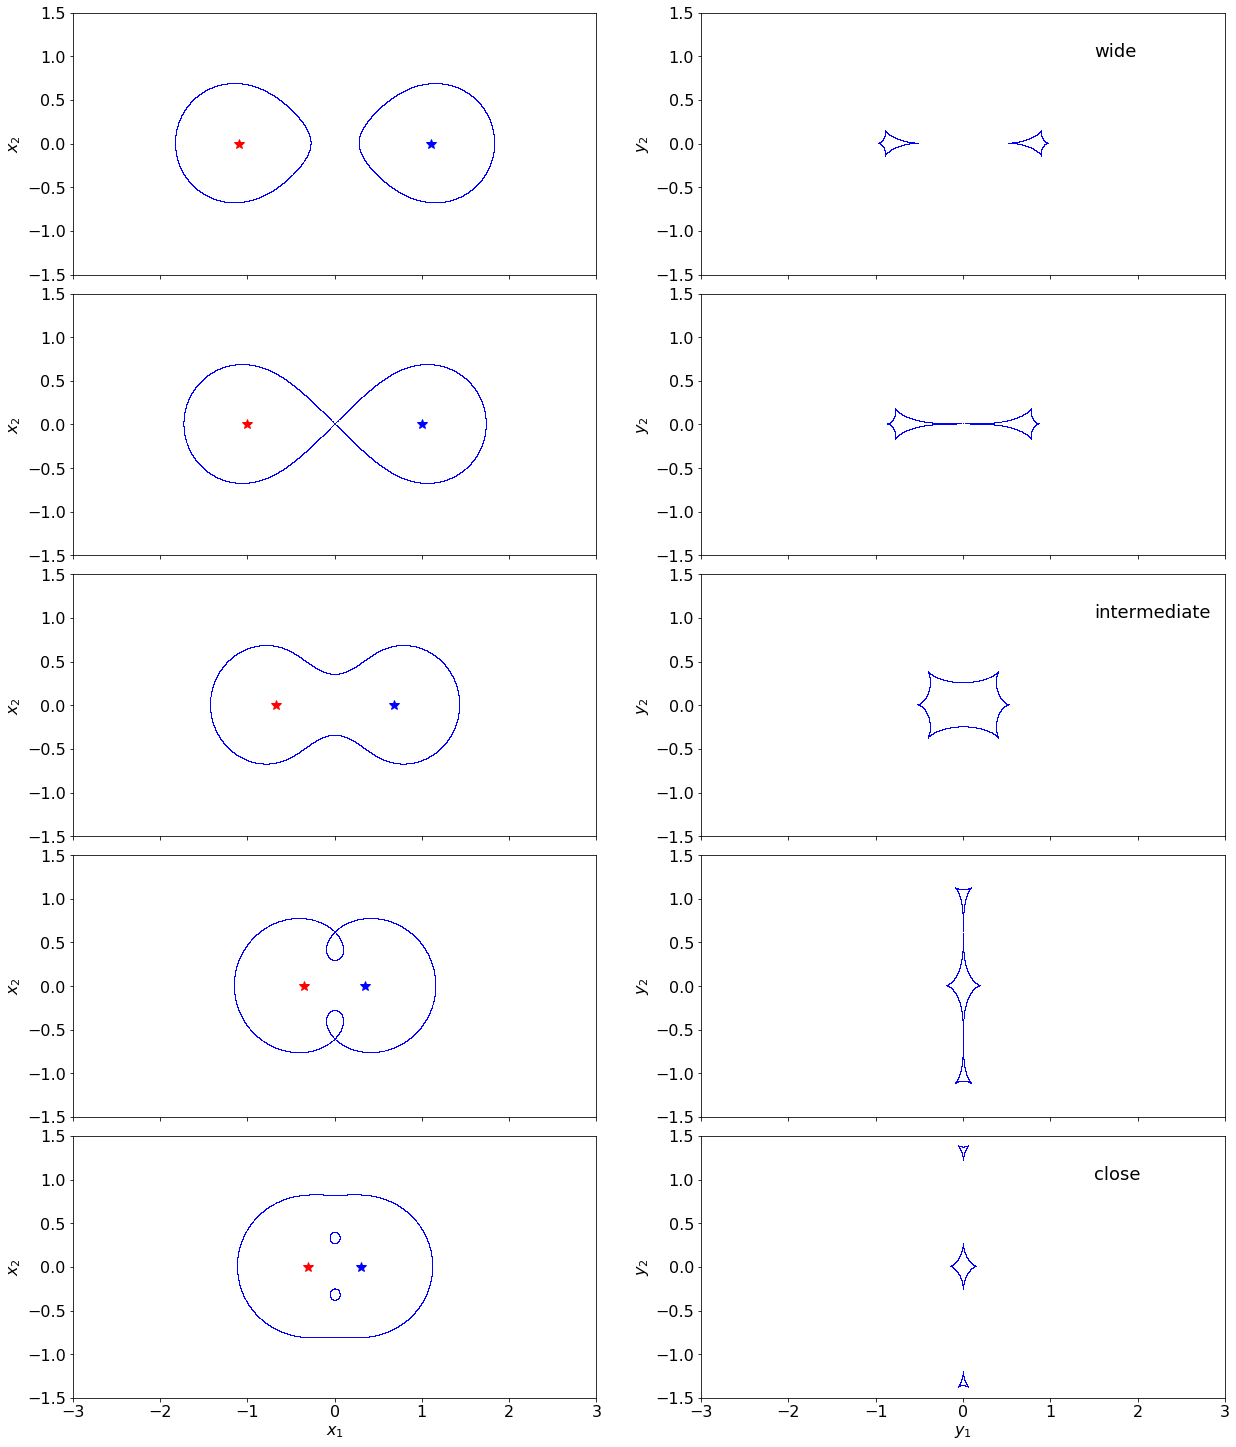

In [138]:
%matplotlib inline
m1=1.0
q=1.0
m2=m1/q
mtot=m1+m2
dwi=((m1/mtot)**(1./3.)+(m2/mtot)**(1./3.))**(3./2.)
dic=((m1/mtot)**(1./3.)+(m2/mtot)**(1./3.))**(-3./4.)

d=[dwi+0.2,dwi,0.5*(dwi+dic),dic,dic-0.1]

fig,ax=plt.subplots(len(d),2,figsize=(20,25),sharex=True)
desired_box_ratioN=0.5
for i in range(len(d)):
    bl=binary_lens(m1=1.0,q=q,d=d[i])
    x1,x2,xs1,xs2=bl.CritCau()

    ax[i,0].plot(x1,x2,',',color='blue')
    ax[i,1].plot(xs1,xs2,',',color='blue')

    # the positions of the two lenses
    z1=bl.getPos()
    z2=-z1
    ax[i,0].plot([z1.real],[z1.imag],'*',markersize=10,color='blue')
    ax[i,0].plot([z2.real],[z2.imag],'*',markersize=10,color='red')
    
    ax[i,0].xaxis.set_tick_params(labelsize=16)
    ax[i,0].yaxis.set_tick_params(labelsize=16)
    ax[i,1].xaxis.set_tick_params(labelsize=16)
    ax[i,1].yaxis.set_tick_params(labelsize=16)    

    #ax[i,0].set_xlabel('$x_1$',fontsize=16)
    ax[i,0].set_ylabel('$x_2$',fontsize=16)     
    #ax[i,1].set_xlabel('$y_1$',fontsize=16)
    ax[i,1].set_ylabel('$y_2$',fontsize=16) 
    
    xlim=np.array([-3.0,3.0])
    ylim=xlim/2.0
    ax[i,0].set_xlim(xlim)
    ax[i,0].set_ylim(ylim)
    ax[i,1].set_xlim(xlim)
    ax[i,1].set_ylim(ylim)
    
    temp_inverse_axis_ratioN = abs( (ax[i,0].get_xlim()[1] - ax[i,0].get_xlim()[0])/(ax[i,0].get_ylim()[1] - ax[i,0].get_ylim()[0]) )
    ax[i,0].set(aspect = desired_box_ratioN * temp_inverse_axis_ratioN, adjustable='box-forced')
    ax[i,1].set(aspect = desired_box_ratioN * temp_inverse_axis_ratioN, adjustable='box-forced')
    #ax[i,0].set(aspect=0.5)
    #ax[i,1].set(aspect=0.5)
    
fig.subplots_adjust(left=0.1,bottom=0.1)
ax[len(d)-1,0].set_xlabel('$x_1$',fontsize=16)
ax[len(d)-1,1].set_xlabel('$y_1$',fontsize=16)
fig.subplots_adjust(hspace=0)  
ax[0,1].text(1.5,1,'wide',fontsize=18)
ax[2,1].text(1.5,1,'intermediate',fontsize=18)
ax[4,1].text(1.5,1,'close',fontsize=18)
fig.savefig('binary_cc.png')


We can recognize two transitions. The first, between wide and intermediate topologies, occurs for 
$$
d=d_{WI}=(m_1^{1/3}+m_2^{1/3})^{3/2}
$$
The second, between intermediate and close topologies, occurs for
$$
d=d_{IC}=(m_1^{1/3}+m_2^{1/3})^{-3/4}
$$

Where do these fomulas come from? To figure this out, we can visualize the surface $\det A$ for these two spearations between the lenses:

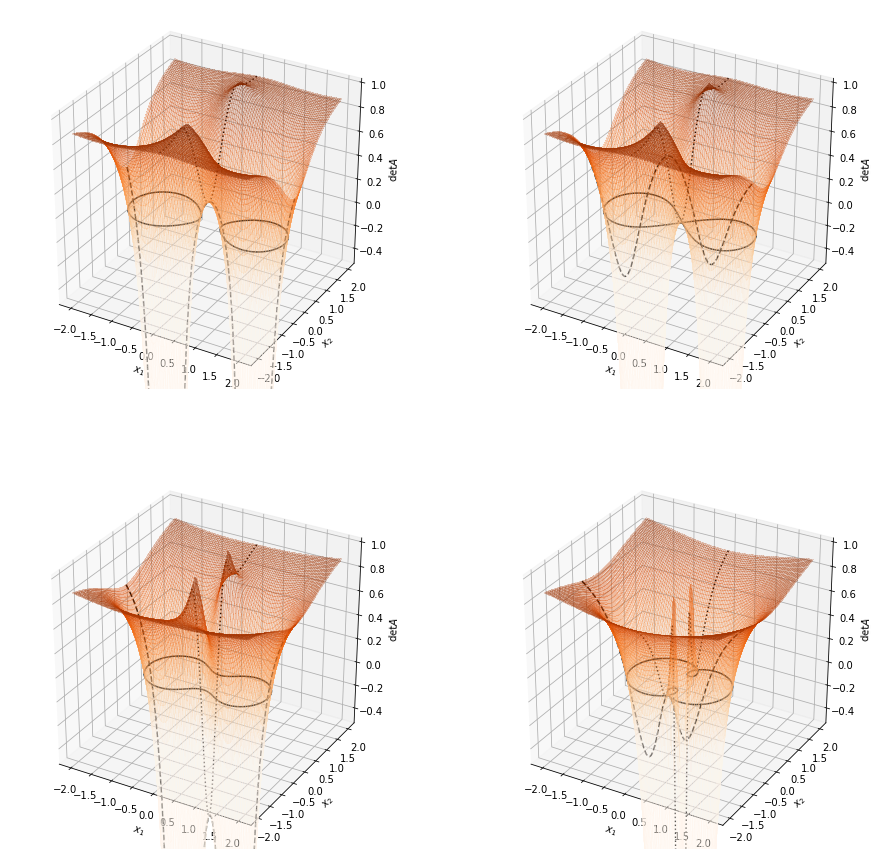

In [139]:


m1=1.0
q=0.8
m2=m1/q
mtot=m1+m2
dwi=((m1/mtot)**(1./3.)+(m2/mtot)**(1./3.))**(3./2.)
dic=((m1/mtot)**(1./3.)+(m2/mtot)**(1./3.))**(-3./4.)

bl0=binary_lens(m1=1.0,q=q,d=dwi+0.2)
bl1=binary_lens(m1=1.0,q=q,d=dwi)
bl2=binary_lens(m1=1.0,q=q,d=0.5*(dwi+dic))
bl3=binary_lens(m1=1.0,q=q,d=dic)
bl4=binary_lens(m1=1.0,q=q,d=dic-0.2)

x=np.linspace(-2,2,100)
X,Y=np.meshgrid(x,x)
#Z=complex(X.reshape(len(x)*len(x)),Y.reshape(len(x)*len(x)))
Z=X+Y*1j
detA0=bl0.detA(Z)
detA1=bl1.detA(Z)
detA2=bl2.detA(Z)
detA3=bl3.detA(Z)
detA4=bl4.detA(Z)

# show the detA surface
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
%matplotlib inline

#%matplotlib notebook
#%matplotlib notebook
#plt.ion()
fig = plt.figure(figsize=(15.5,15.5))
ax0 = fig.add_subplot(221, projection='3d')

ax0.plot_surface(X,Y,detA0,vmax=1,vmin=-0.5,rstride=1,
                     cstride=1,cmap=plt.get_cmap('Oranges'),
                     linewidth=0, antialiased=False,alpha=0.2)
cset = ax0.contour(X, Y, detA0, zdir='z', 
                    offset=0, colors='black',levels=[0]) 
cset = ax0.contour(X, Y, detA0, zdir='x', offset=0, colors='black',levels=[0],linestyles='dotted')
cset = ax0.contour(X, Y, detA0, zdir='y', offset=0, colors='black',levels=[0],linestyles='dashed')
ax1 = fig.add_subplot(222, projection='3d')

ax1.plot_surface(X,Y,detA1,vmax=1,vmin=-0.5,rstride=1,
                     cstride=1,cmap=plt.get_cmap('Oranges'),
                     linewidth=0, antialiased=False,alpha=0.2)
cset = ax1.contour(X, Y, detA1, zdir='z', 
                    offset=0, colors='black',levels=[0])
                 
cset = ax1.contour(X, Y, detA1, zdir='x', offset=0, colors='black',levels=[0],linestyles='dotted')
cset = ax1.contour(X, Y, detA1, zdir='y', offset=-0.6, colors='black',levels=[-0.6],linestyles='dashed')

ax2 = fig.add_subplot(223, projection='3d')

ax2.plot_surface(X,Y,detA2,vmax=1,vmin=-0.5,rstride=1,
                     cstride=1,cmap=plt.get_cmap('Oranges'),
                     linewidth=0, antialiased=False,alpha=0.2)
cset = ax2.contour(X, Y, detA2, zdir='z', 
                    offset=0, colors='black',levels=[0]) 
cset = ax2.contour(X, Y, detA2, zdir='x', offset=0, colors='black',levels=[0],linestyles='dotted')
cset = ax2.contour(X, Y, detA2, zdir='y', offset=0, colors='black',levels=[0],linestyles='dashed')
ax3 = fig.add_subplot(224, projection='3d')

ax3.plot_surface(X,Y,detA3,vmax=1,vmin=-0.5,rstride=1,
                     cstride=1,cmap=plt.get_cmap('Oranges'),
                     linewidth=0, antialiased=False,alpha=0.2)
cset = ax3.contour(X, Y, detA3, zdir='z', 
                    offset=0, colors='black',levels=[0])
                 
cset = ax3.contour(X, Y, detA3, zdir='x', offset=0, colors='black',levels=[0],linestyles='dotted')
cset = ax3.contour(X, Y, detA3, zdir='y', offset=-0.6, colors='black',levels=[-0.6],linestyles='dashed')

ax0.set_zlim3d(-0.5, 1.0)
ax1.set_zlim3d(-0.5, 1.0)
ax1.set_xlabel('$x_1$')
ax1.set_ylabel('$x_2$')
ax1.set_zlabel('$\det A$')
ax0.set_xlabel('$x_1$')
ax0.set_ylabel('$x_2$')
ax0.set_zlabel('$\det A$')

ax2.set_zlim3d(-0.5, 1.0)
ax3.set_zlim3d(-0.5, 1.0)
ax3.set_xlabel('$x_1$')
ax3.set_ylabel('$x_2$')
ax3.set_zlabel('$\det A$')
ax2.set_xlabel('$x_1$')
ax2.set_ylabel('$x_2$')
ax2.set_zlabel('$\det A$')

fig.savefig('detA_surfaces.png')


Clearly, the points where the critical lines touch at the transitions are saddle points of $\det A$. The formulas above were derived by Erdl & Schneider (1993), using the condition for the formation of such saddle points:

$$
\frac{\partial \det A(z)}{\partial z^*}=0 \;. 
$$


# Multiple images

To find the positions of the images of a source at $z_s$, we can turn the lens equation into a 5-th order complex polynomial and find its roots using the same method used to find the critical points.

The polynomial can be written as:
$$
p_5(z)=\sum_{i=0}^{5}c_i z^i
$$
and, after setting 
$$
\Delta m= \frac{m_1-m_2}{2} \hspace{1cm}  m=\frac{m_1+m_2}{2} \hspace{1cm} z_2=-z_1 \hspace{1cm} z_1=z_1^* \;,
$$
the coefficients turn out to be
$$
c_0=z_1^2[4(\Delta m)^2 z_s+4m\Delta m z_1 +4 \Delta m z_s z_s^* z_1 +2mz_s^*z_1^2+z_sz_s^{*2}z_1^2-2\Delta m z_1^3-z_sz_1^4] \\
c_1=-8m\Delta m z_s z_1 - 4 (\Delta m)^2z_1^2-4m^2z_1^2-4mz_sz_s^*z_1^2-4\Delta m z_s^*z_1^3-z_s^{*2}z_1^4+z_1^6 \\
c_2=4 m^2 z_s+4 m \Delta m z_1 -4 \Delta m z_s z_s^* z_1 -2 z_s z_s^{*2}z_1^2 + 4 \Delta m z_1^3+2z_sz_1^4 \\
c_3 = 4m z_s z_s^*+4 \Delta m z_s^* z_1+2 z_s^{*2}z_1^2-2z_1^4 \\
c_4 = -2mz_s^*+z_sz_s^{*2}-2\Delta m z_1 - z_s z_1^2 \\
c_5 = z_1^2-z_s^{*2}
$$

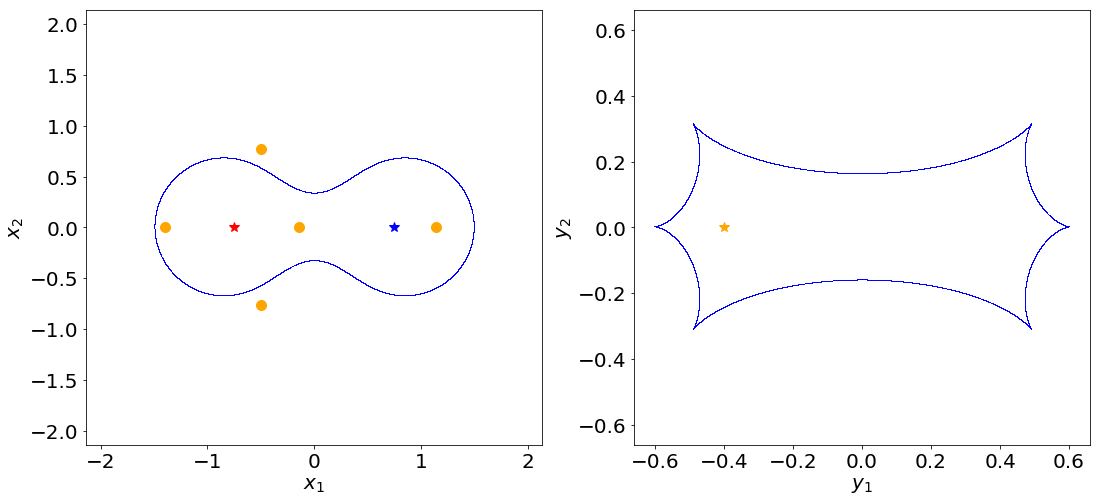

In [140]:
%matplotlib inline
bl=binary_lens(m1=1.0,q=1.0,d=1.5)
#bl=binary_lens(m1=1.0,q=1.0,d=0.6)
x1,x2,xs1,xs2=bl.CritCau()

ys1,ys2=-0.4,0.0
#ys1,ys2=-0.2,0.4
xi1,xi2=bl.Images(ys1,ys2)


###############################################################################

fig,ax=plt.subplots(1,2,figsize=(18,8))

# plot the results
ax[0].plot(x1,x2,',',color='blue')
ax[1].plot(xs1,xs2,',',color='blue')
z1=bl.getPos()
z2=-z1
ax[0].plot([z1.real],[z1.imag],'*',markersize=10,color='blue')
ax[0].plot([z2.real],[z2.imag],'*',markersize=10,color='red')

# set dimensions of image plane plotting area
xmin=np.amin(x1)
xmax=np.amax(x1)
ymin=np.amin(x2)
ymax=np.amax(x2)
dim=[xmax-xmin,ymax-ymin]
if (dim[0]>dim[1]):
    side=dim[0]*1.1
else:
    side=dim[1]*1.1

    
xmin_=0.5*(xmin+xmax)-1.3*side/2.0
xmax_=0.5*(xmin+xmax)+1.3*side/2.0
ymin_=0.5*(ymin+ymax)-1.3*side/2.0
ymax_=0.5*(ymin+ymax)+1.3*side/2.0


ax[0].set_xlim([xmin_,xmax_])
ax[0].set_ylim([ymin_,ymax_])

# set dimensions of source plane plotting area
xmin=np.amin(xs1)
xmax=np.amax(xs1)
ymin=np.amin(xs2)
ymax=np.amax(xs2)
dim=[xmax-xmin,ymax-ymin]
if (dim[0]>dim[1]):
    side=dim[0]*1.1
else:
    side=dim[1]*1.1

    
xmin_=0.5*(xmin+xmax)-side/2.0
xmax_=0.5*(xmin+xmax)+side/2.0
ymin_=0.5*(ymin+ymax)-side/2.0
ymax_=0.5*(ymin+ymax)+side/2.0

ax[1].set_xlim([xmin_,xmax_])
ax[1].set_ylim([ymin_,ymax_])

ax[0].xaxis.set_tick_params(labelsize=20)
ax[0].yaxis.set_tick_params(labelsize=20)
ax[1].xaxis.set_tick_params(labelsize=20)
ax[1].yaxis.set_tick_params(labelsize=20)    

ax[0].set_xlabel('$x_1$',fontsize=20)
ax[0].set_ylabel('$x_2$',fontsize=20)     
ax[1].set_xlabel('$y_1$',fontsize=20)
ax[1].set_ylabel('$y_2$',fontsize=20)

ax[1].plot(ys1,ys2,'*',markersize=10,color='orange')
ax[0].plot(xi1,xi2,'o',markersize=10,color='orange')



## Moving source

We can put the source on a trajectory to see how the image positions change as a function of time:

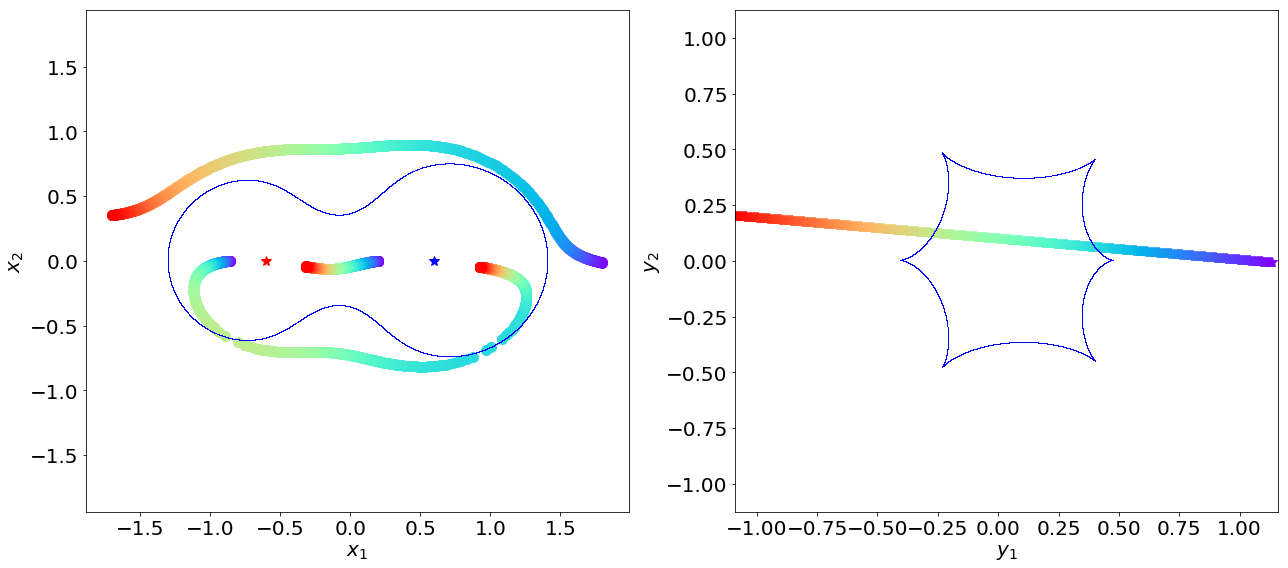

In [167]:
from matplotlib.pyplot import cm 

# resonant topology (q=1)
#times=np.linspace(-90,90,730)
#bl=binary_lens(m1=1.0,q=1.0,d=1.,t0=0.0,y0=-0.25,theta=np.pi/4.*3.0)

# close topology (primary caustic crossing)
#times=np.linspace(-50,50,730)
#bl=binary_lens(m1=1.0,q=1.8,d=0.65,t0=0.0,y0=0.15,theta=1.9*np.pi)

# intermediate (resonant) topology
times=np.linspace(-50,50,730)
bl=binary_lens(m1=1.0,q=1.4,d=1.2,t0=0.0,y0=-0.1,theta=0.97*np.pi)

# close topology (between caustics)
#times=np.linspace(-90,90,730)
#bl=binary_lens(m1=1.0,q=1.0,d=0.6,t0=0.0,y0=0.35,theta=1.8*np.pi)

# wide topology
#times=np.linspace(-190,190,730)
#bl=binary_lens(m1=1.0,q=1.0,d=4.6,t0=0.0,y0=0.4,theta=0)

# wide jackpot
#bl=binary_lens(m1=1.0,q=1.0,d=4.6,t0=0.0,y0=0.01,theta=0)


x1,x2,xs1,xs2=bl.CritCau()

color=iter(cm.rainbow(np.linspace(0,1,times.size)))

fig,ax=plt.subplots(1,2,figsize=(18,8))


for t in times:
    c=next(color)
    ys1,ys2=bl.SourcePos(t)
    xi1,xi2=bl.Images(ys1,ys2)
    ax[1].plot(ys1,ys2,'*',markersize=10,color=c)
    ax[0].plot(xi1,xi2,'o',markersize=10,color=c)

ax[0].plot(x1,x2,',',color='blue')
ax[1].plot(xs1,xs2,',',color='blue')
#################################################################
    
z1=bl.getPos()
z2=-z1
ax[0].plot([z1.real],[z1.imag],'*',markersize=10,color='blue')
ax[0].plot([z2.real],[z2.imag],'*',markersize=10,color='red')

# set dimensions of image plane plotting area
xmin=np.amin(x1)
xmax=np.amax(x1)
ymin=np.amin(x2)
ymax=np.amax(x2)
dim=[xmax-xmin,ymax-ymin]
if (dim[0]>dim[1]):
    side=dim[0]*1.1
else:
    side=dim[1]*1.1

    
xmin_=0.5*(xmin+xmax)-1.3*side/2.0
xmax_=0.5*(xmin+xmax)+1.3*side/2.0
ymin_=0.5*(ymin+ymax)-1.3*side/2.0
ymax_=0.5*(ymin+ymax)+1.3*side/2.0


ax[0].set_xlim([xmin_,xmax_])
ax[0].set_ylim([ymin_,ymax_])

# set dimensions of source plane plotting area
xmin=np.amin(xs1)
xmax=np.amax(xs1)
ymin=np.amin(xs2)
ymax=np.amax(xs2)
dim=[xmax-xmin,ymax-ymin]
if (dim[0]>dim[1]):
    side=dim[0]*3.5
else:
    side=dim[1]*3.5

    
xmin_=0.5*(xmin+xmax)-side/3.0
xmax_=0.5*(xmin+xmax)+side/3.0
ymin_=0.5*(ymin+ymax)-side/3.0
ymax_=0.5*(ymin+ymax)+side/3.0

ax[1].set_xlim([xmin_,xmax_])
ax[1].set_ylim([ymin_,ymax_])

ax[0].xaxis.set_tick_params(labelsize=20)
ax[0].yaxis.set_tick_params(labelsize=20)
ax[1].xaxis.set_tick_params(labelsize=20)
ax[1].yaxis.set_tick_params(labelsize=20)    

ax[0].set_xlabel('$x_1$',fontsize=20)
ax[0].set_ylabel('$x_2$',fontsize=20)     
ax[1].set_xlabel('$y_1$',fontsize=20)
ax[1].set_ylabel('$y_2$',fontsize=20)

fig.tight_layout()
fig.savefig('bl_multima.png')


# Magnification

As in the case of microlensing by single lenses, multiple images remain undetected and the binary microlensing can be revealed only by means of the magnification effects (photometric and astrometric microlensing).

The magnification of each image can be computed using the formula:
$$
\det A = 1-\left|\sum_{i=1}^{2}\frac{m_i}{(z^*-z_i^*)^2}\right|
$$
remembering that $\mu=\det A^{-1}$.

Then, one must sum up the magnifications of all images to obtain the total magnification of the source.

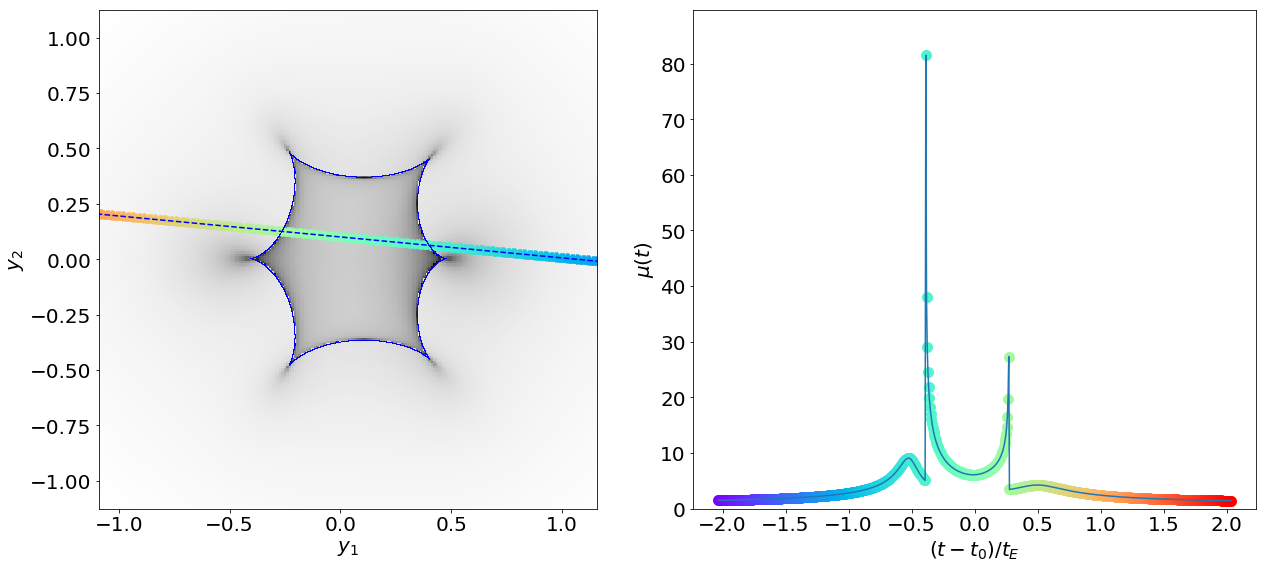

In [146]:
p,mu=bl.LightCurve(times) # the function LightCurve computes the magnifications at the image positions for a given source
                          # position. The source position is parametrized in terms of the time (the function 
                          # returns p=(t-t0)/tE) and mu(p))

mumap = bl.MagnificationMap(xmin_,xmax_,ymin_,ymax_) # similarly, th function MagnificationMap computes the map of the 
                                                     # magnification on the source plane

fig,ax=plt.subplots(1,2,figsize=(18,8))

ax[0].imshow(np.log10(mumap),origin='low',cmap='Greys',extent=[xmin_,xmax_,ymin_,ymax_])
color=iter(cm.rainbow(np.linspace(0,1,times.size)))
ys1,ys2=bl.SourcePos(times) # this gives the source position as a function of time.
for i in range(times.size):
    c=next(color)
    #ys1,ys2=bl.SourcePos(times[i])
    ax[0].plot(ys1[i],ys2[i],'*',markersize=10,c=c)
    ax[1].plot([p[i]],[mu[i]],'o',markersize=10,c=c)

####################################################################
    
ax[0].plot(ys1,ys2,'--',color='blue')
ax[1].plot(p,mu,'-')
ax[1].set_ylim([0.0,np.max(mu)*1.1])
ax[0].set_xlim([xmin_,xmax_])
ax[0].set_ylim([ymin_,ymax_])

ax[0].xaxis.set_tick_params(labelsize=20)
ax[0].yaxis.set_tick_params(labelsize=20)

ax[0].set_xlabel('$y_1$',fontsize=20)
ax[0].set_ylabel('$y_2$',fontsize=20)

ax[1].xaxis.set_tick_params(labelsize=20)
ax[1].yaxis.set_tick_params(labelsize=20)
ax[1].set_xlabel('$(t-t_0)/t_E$',fontsize=20)
ax[1].set_ylabel('$\mu(t)$',fontsize=20)
ax[0].plot(xs1,xs2,',',color='blue')

fig.tight_layout()
fig.savefig('bl_lightcurve.png')